# Xパワーvsブキ使用率

In [398]:
import datetime as dt
import src.analytics2 as a
import src.visualize2 as v
import src.definitions as d

# Context
date_from = dt.date(2022, 12, 9)
date_to = dt.date(2023, 1, 1)
lobby = d.Lobby.XMATCH

f"{str(date_from)} <= date < {str(date_to)}"


'2022-12-09 <= date < 2023-01-01'

In [399]:
translations = v.get_translations()
details = a.read_details_from_to(date_from, date_to, lobby)
details = details[details["game-ver"] == "2.0.1"]
players = a.details_to_players(details)
details["mode"].value_counts()


area      10331
yagura     7224
hoko       6957
asari      4603
Name: mode, dtype: int64

## Xパワーの分布

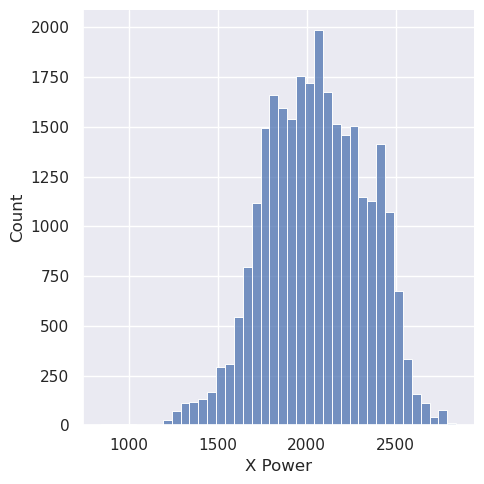

count    27786.000000
mean      2045.351256
std        283.376352
min        840.000000
25%       1840.000000
50%       2040.000000
75%       2260.000000
max       2830.000000
Name: x-power, dtype: float64

In [400]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

ax = sns.displot(data=details, x="x-power", binwidth=50)
ax.set(xlabel="X Power")
plt.show()

details["x-power"].describe()

## Xパワーごとのブキ使用率

カーネル密度推定を使用して大まかな傾向を可視化する

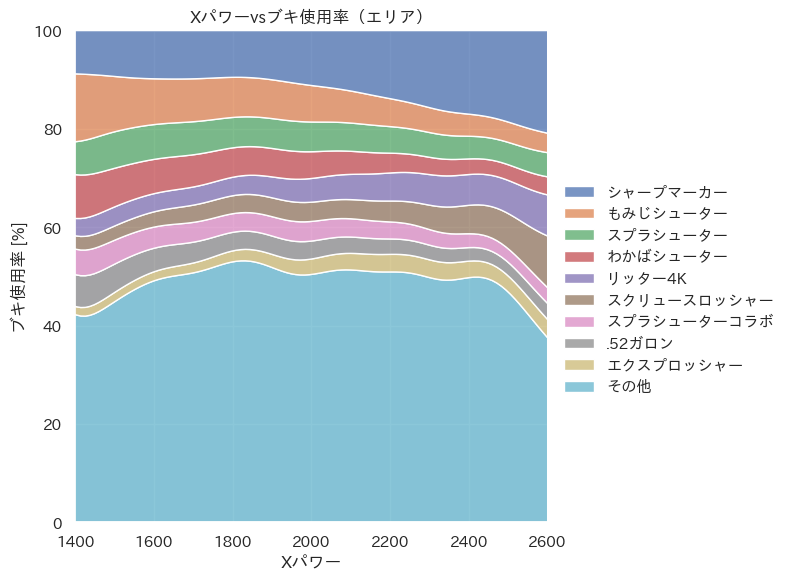

In [401]:
plt, ax = v.show_xpower_vs_weapon_usage(players, "area")
plt.show()

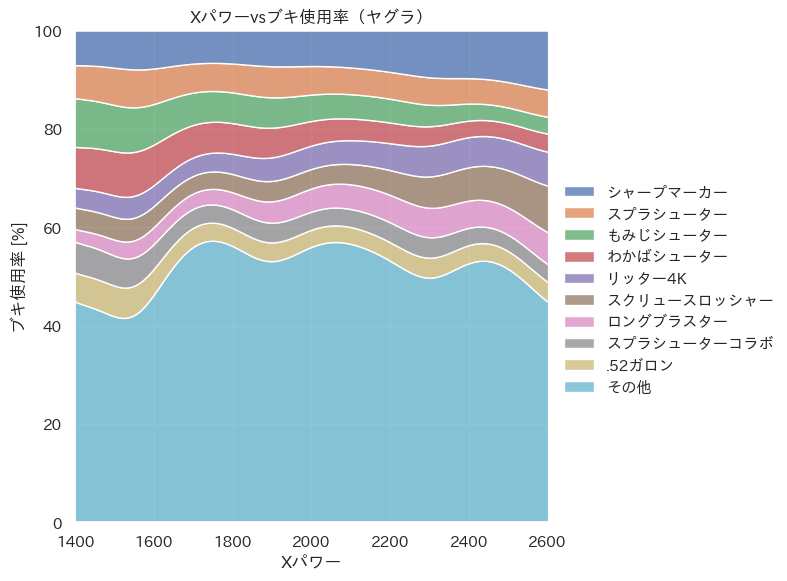

In [402]:
plt, ax = v.show_xpower_vs_weapon_usage(players, "yagura")
plt.show()

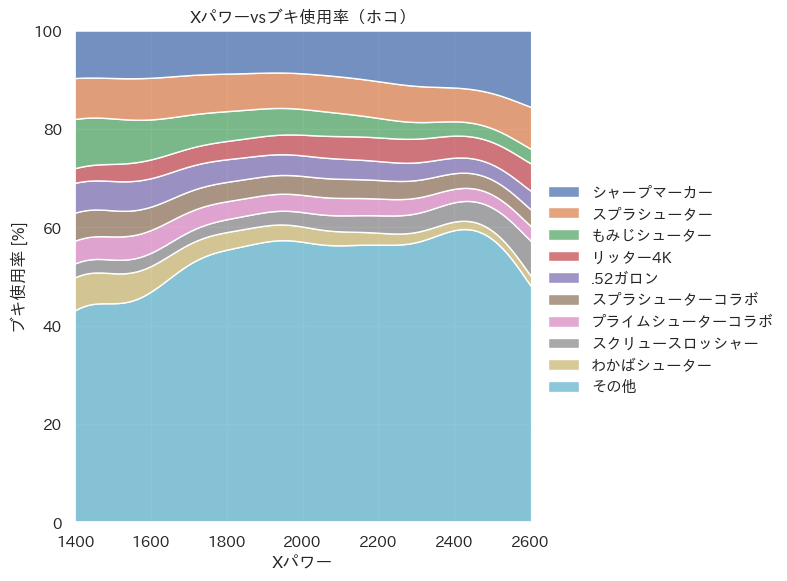

In [403]:
plt, ax = v.show_xpower_vs_weapon_usage(players, "hoko", figsize=(8, 6))
plt.show()

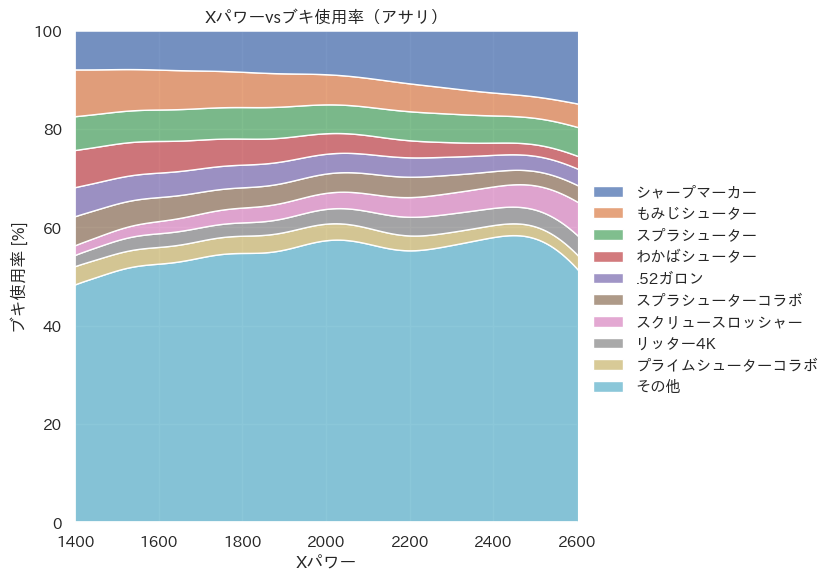

In [404]:
plt, ax = v.show_xpower_vs_weapon_usage(players, "asari", figsize=(8.5, 6))
plt.show()

## 実際の数値を見てみる


In [405]:
q25 = details["x-power"].quantile(0.25)
q50 = details["x-power"].quantile(0.5)
q75 = details["x-power"].quantile(0.75)

q25, q50, q75

(1840.0, 2040.0, 2260.0)

In [406]:
details_q1 = details[details["x-power"] < q25]
details_q2 = details[(details["x-power"]  >= q25) & (details["x-power"]  < q50)]
details_q3 = details[(details["x-power"]  >= q50) & (details["x-power"]  < q75)]
details_q4 = details[(details["x-power"]  >= q75)]

players_q1 = a.details_to_players(details_q1)
players_q2 = a.details_to_players(details_q2)
players_q3 = a.details_to_players(details_q3)
players_q4 = a.details_to_players(details_q4)

In [407]:
import pandas as pd

details_list = map(lambda x: x["mode"].value_counts().to_frame(), [details_q1, details_q2, details_q3, details_q4])
battle_num = pd.concat(details_list, axis=1).set_axis(["G1", "G2", "G3", "G4"], axis=1)
battle_num

,G1,G2,G3,G4
area,2441,2208,2797,2467
yagura,1756,1530,1953,1641
hoko,1553,1834,1555,1713
asari,1123,1039,927,1249


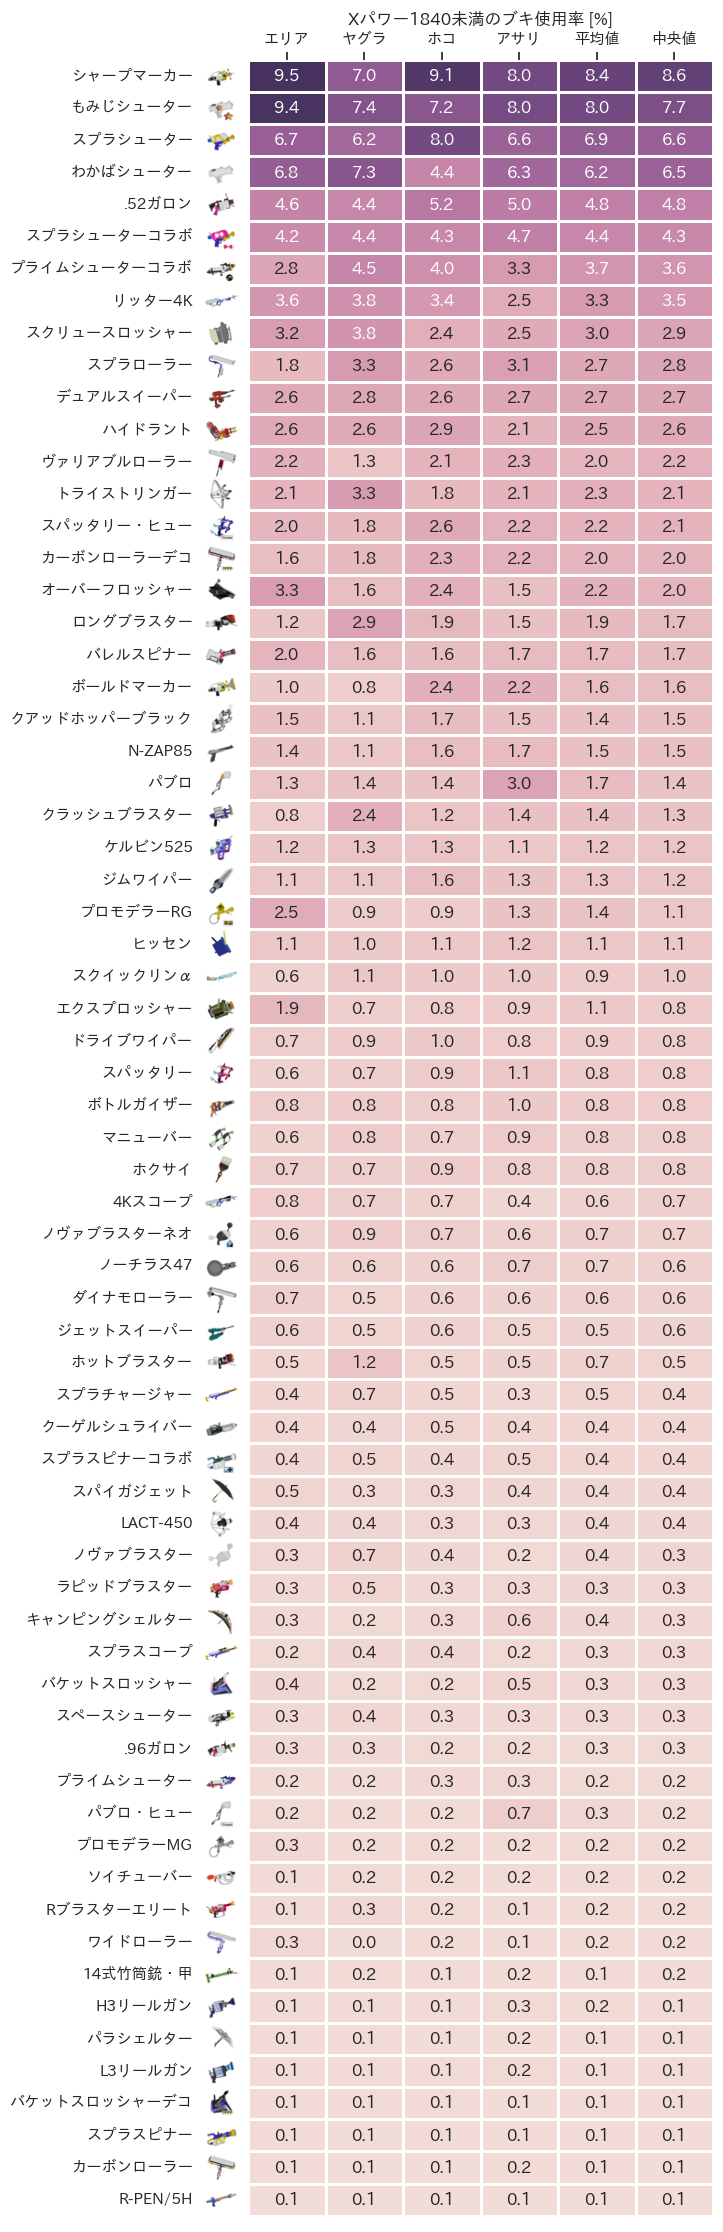

In [408]:
aggregated = a.aggregate_index_per_subject(players_q1, "weapon", "usage-rate")
plt, ax = v.show_aggregated_heatmap(
    aggregated,
    title=f"Xパワー{round(q25)}未満のブキ使用率 [%]",
    figsize=(6, 28),
    use_annotation_image=True,
)
plt.show()

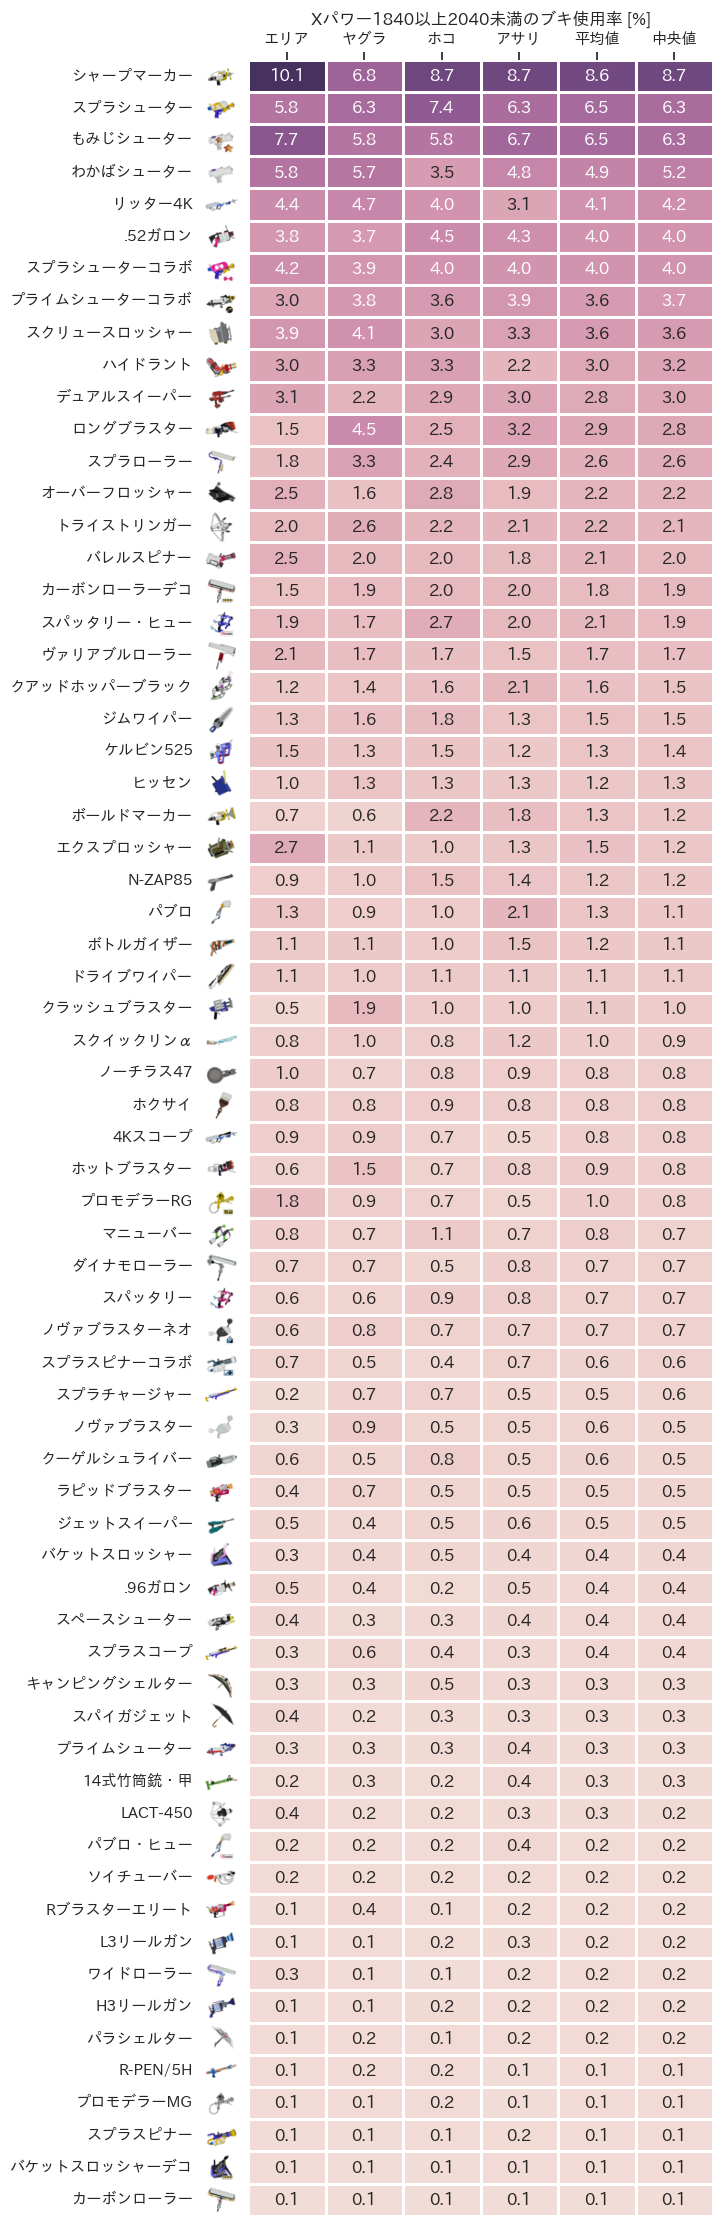

In [409]:
aggregated = a.aggregate_index_per_subject(players_q2, "weapon", "usage-rate")
plt, ax = v.show_aggregated_heatmap(
    aggregated,
    title=f"Xパワー{round(q25)}以上{round(q50)}未満のブキ使用率 [%]",
    figsize=(6, 28),
    use_annotation_image=True,
)
plt.show()

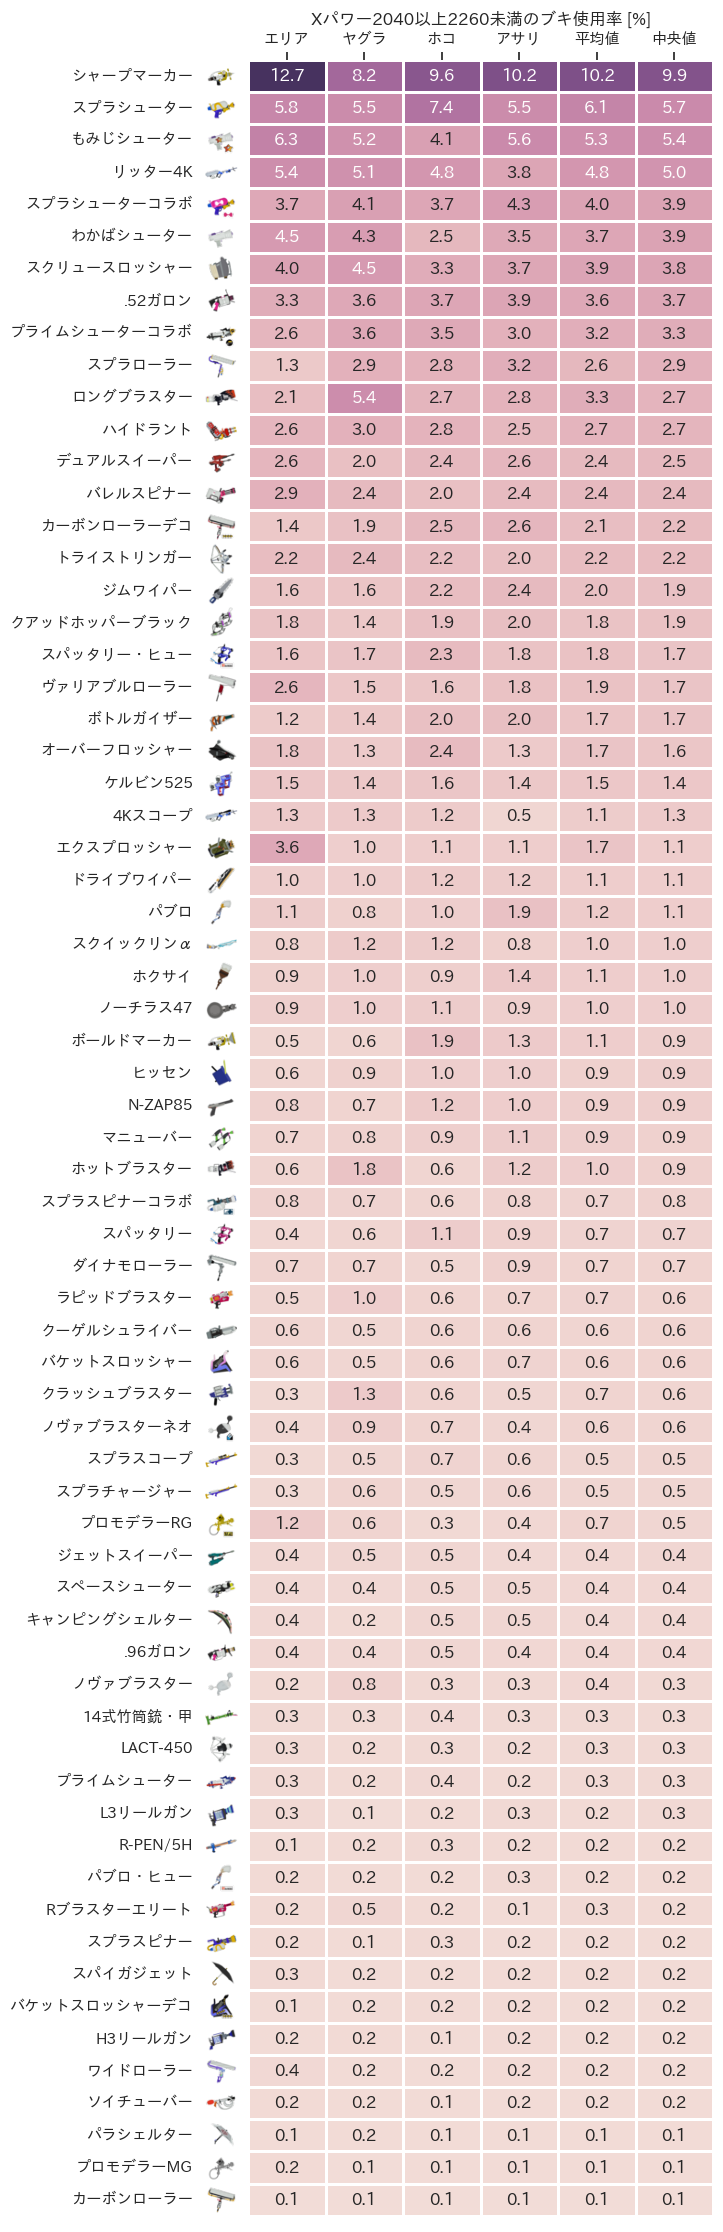

In [410]:
aggregated = a.aggregate_index_per_subject(players_q3, "weapon", "usage-rate")
plt, ax = v.show_aggregated_heatmap(
    aggregated,
    title=f"Xパワー{round(q50)}以上{round(q75)}未満のブキ使用率 [%]",
    figsize=(6, 28),
    use_annotation_image=True,
)
plt.show()

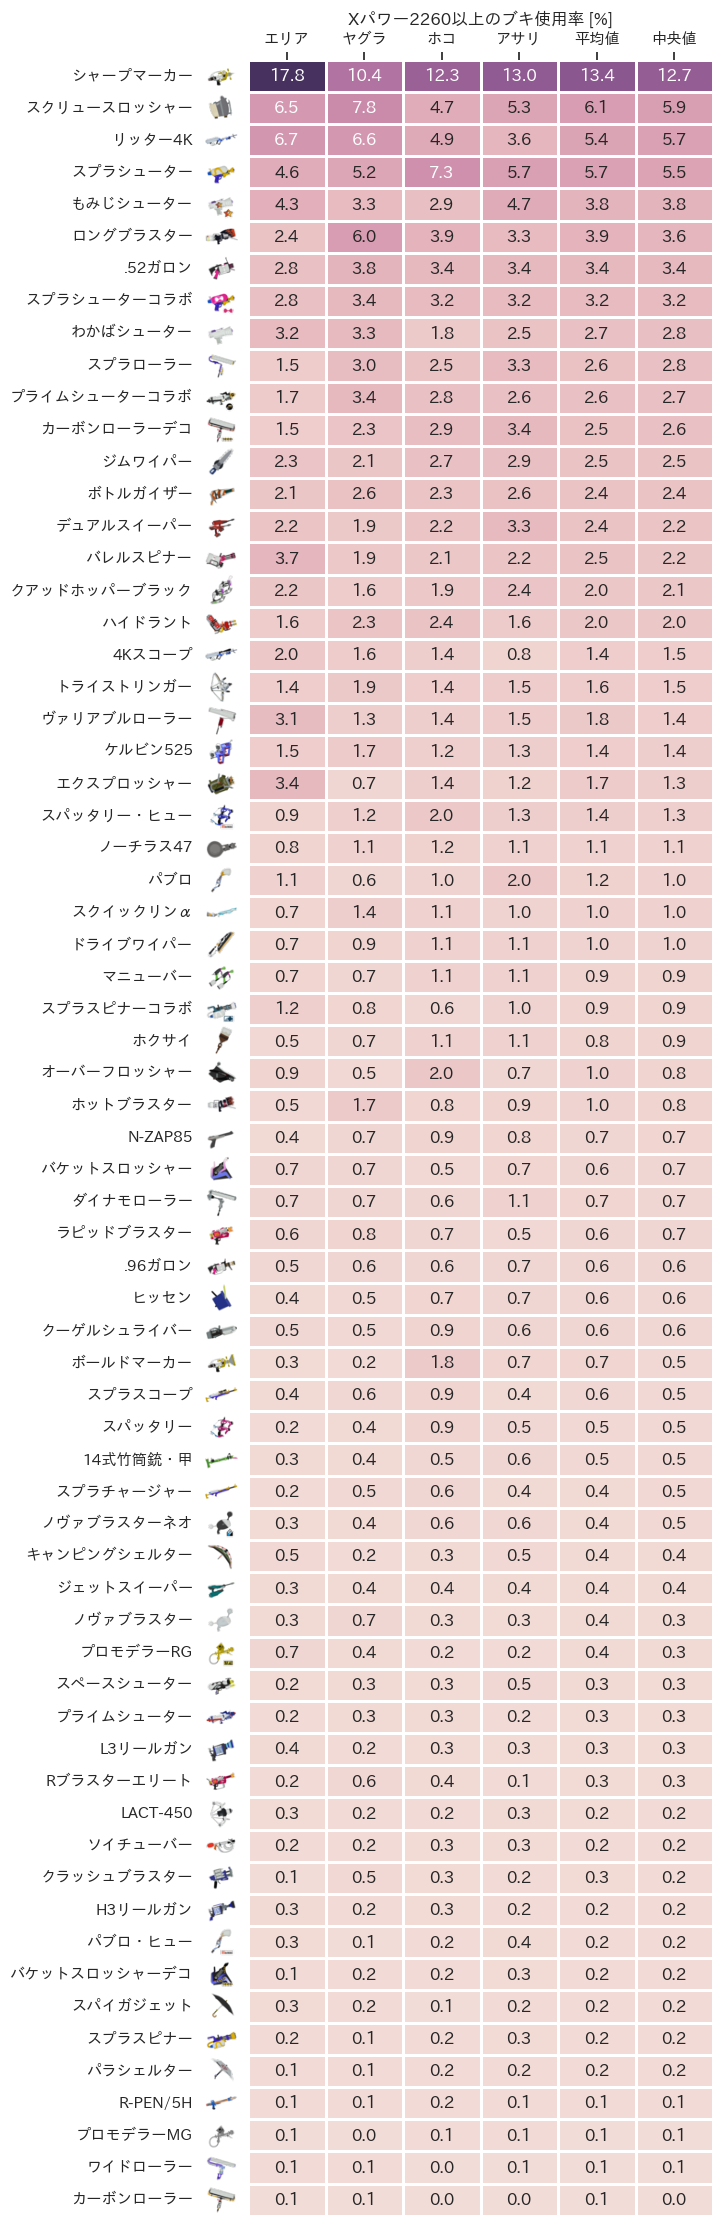

In [411]:
aggregated = a.aggregate_index_per_subject(players_q4, "weapon", "usage-rate")

plt, ax = v.show_aggregated_heatmap(
    aggregated,
    title=f"Xパワー{round(q75)}以上のブキ使用率 [%]",
    figsize=(6, 28),
    use_annotation_image=True,
)
plt.show()

## ブキプールごとに使用率を確認する


In [412]:
import src.constants as c

main_pool = pd.read_csv(c.SOURCE_MAIN_POOL_PATH, index_col="Key")
aggregated = a.aggregate_index_per_subject(players_q4, "weapon", "usage-rate")

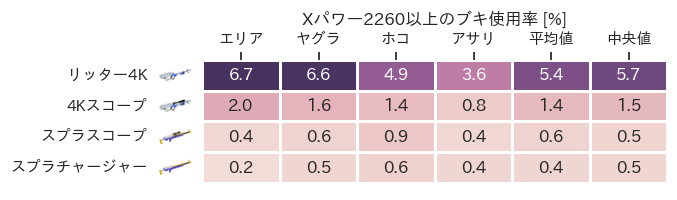

In [413]:
pool = "C"
pool_weapons = main_pool[main_pool["Pool"] == pool].index.to_list()
df = aggregated.filter(items=pool_weapons, axis=0).sort_values("median", ascending=False)

plt, ax = v.show_aggregated_heatmap(
    df,
    title=f"Xパワー{round(q75)}以上のブキ使用率 [%]",
    figsize=(6, 1.6),
    use_annotation_image=True,
)
plt.show()

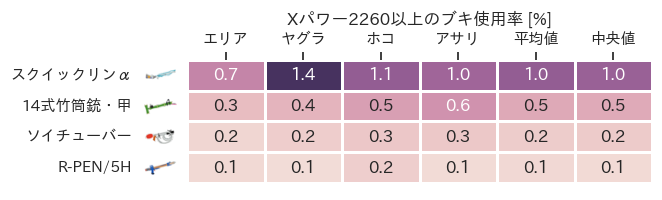

In [414]:
pool = "c"
pool_weapons = main_pool[main_pool["Pool"] == pool].index.to_list()
df = aggregated.filter(items=pool_weapons, axis=0).sort_values("median", ascending=False)

plt, ax = v.show_aggregated_heatmap(
    df,
    title=f"Xパワー{round(q75)}以上のブキ使用率 [%]",
    figsize=(6, 1.6),
    use_annotation_image=True,
)
plt.show()

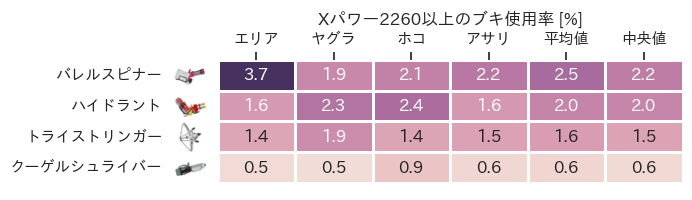

In [415]:
pool = "L"
pool_weapons = main_pool[main_pool["Pool"] == pool].index.to_list()
df = aggregated.filter(items=pool_weapons, axis=0).sort_values("median", ascending=False)

plt, ax = v.show_aggregated_heatmap(
    df,
    title=f"Xパワー{round(q75)}以上のブキ使用率 [%]",
    figsize=(6, 1.6),
    use_annotation_image=True,
)
plt.show()

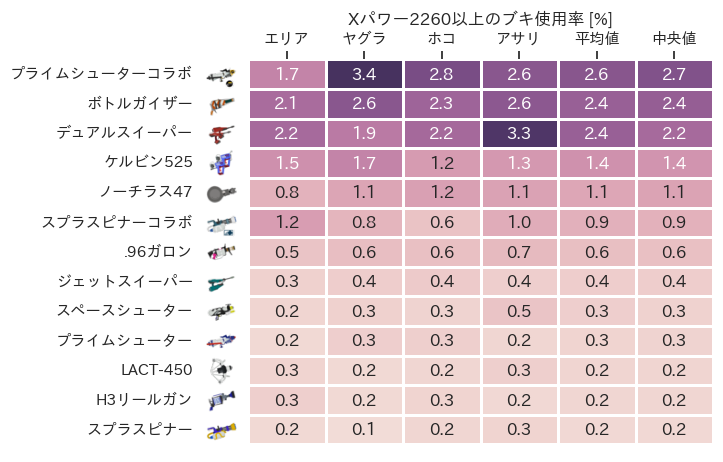

In [416]:
pool = "S"
pool_weapons = main_pool[main_pool["Pool"] == pool].index.to_list()
df = aggregated.filter(items=pool_weapons, axis=0).sort_values("median", ascending=False)

plt, ax = v.show_aggregated_heatmap(
    df,
    title=f"Xパワー{round(q75)}以上のブキ使用率 [%]",
    figsize=(6, 5),
    use_annotation_image=True,
)
plt.show()

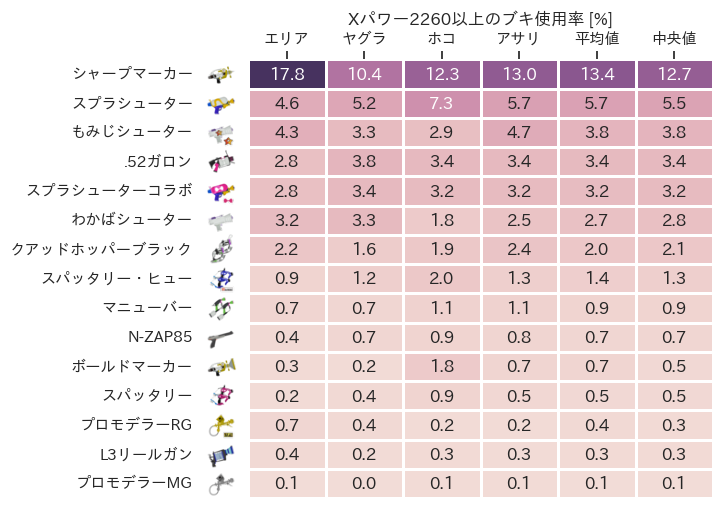

In [417]:
pool = "s"
pool_weapons = main_pool[main_pool["Pool"] == pool].index.to_list()
df = aggregated.filter(items=pool_weapons, axis=0).sort_values("median", ascending=False)

plt, ax = v.show_aggregated_heatmap(
    df,
    title=f"Xパワー{round(q75)}以上のブキ使用率 [%]",
    figsize=(6, 5.7),
    use_annotation_image=True,
)
plt.show()

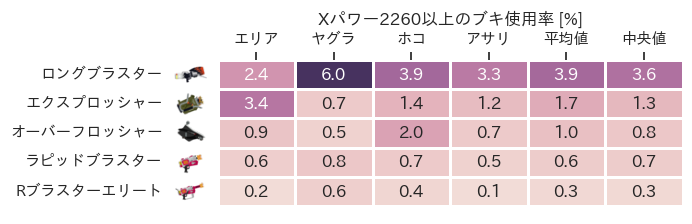

In [418]:
pool = "B"
pool_weapons = main_pool[main_pool["Pool"] == pool].index.to_list()
df = aggregated.filter(items=pool_weapons, axis=0).sort_values("median", ascending=False)

plt, ax = v.show_aggregated_heatmap(
    df,
    title=f"Xパワー{round(q75)}以上のブキ使用率 [%]",
    figsize=(6, 1.9),
    use_annotation_image=True,
)
plt.show()

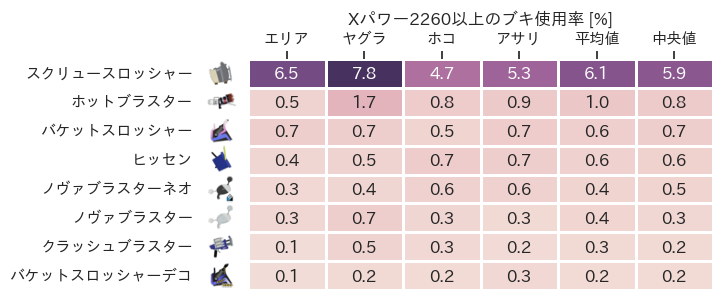

In [419]:
pool = "b"
pool_weapons = main_pool[main_pool["Pool"] == pool].index.to_list()
df = aggregated.filter(items=pool_weapons, axis=0).sort_values("median", ascending=False)

plt, ax = v.show_aggregated_heatmap(
    df,
    title=f"Xパワー{round(q75)}以上のブキ使用率 [%]",
    figsize=(6, 3),
    use_annotation_image=True,
)
plt.show()

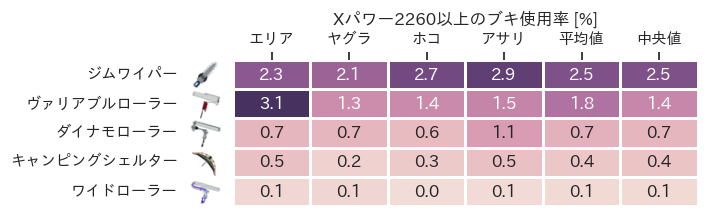

In [420]:
pool = "R"
pool_weapons = main_pool[main_pool["Pool"] == pool].index.to_list()
df = aggregated.filter(items=pool_weapons, axis=0).sort_values("median", ascending=False)

plt, ax = v.show_aggregated_heatmap(
    df,
    title=f"Xパワー{round(q75)}以上のブキ使用率 [%]",
    figsize=(6, 1.9),
    use_annotation_image=True,
)
plt.show()

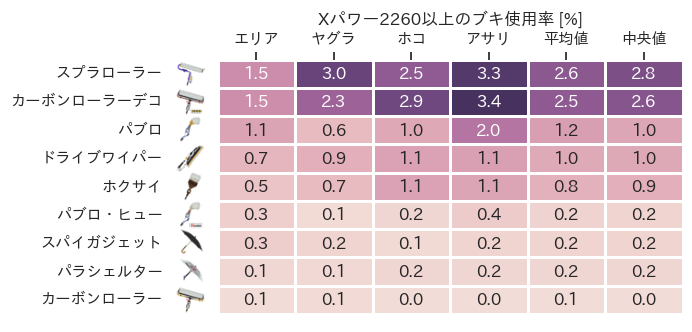

In [421]:
pool = "r"
pool_weapons = main_pool[main_pool["Pool"] == pool].index.to_list()
df = aggregated.filter(items=pool_weapons, axis=0).sort_values("median", ascending=False)

plt, ax = v.show_aggregated_heatmap(
    df,
    title=f"Xパワー{round(q75)}以上のブキ使用率 [%]",
    figsize=(6, 3.3),
    use_annotation_image=True,
)
plt.show()

## 使用率の勾配

In [422]:
def get_usage_diff(mode: str):
    d1 = details[(details["mode"] == mode) & (details["x-power"] < q50)].copy()
    d2 = details[(details["mode"] == mode) & (details["x-power"] >= q50)].copy()
    p1 = a.details_to_players(d1)
    p2 = a.details_to_players(d2)
    u1 = p1["weapon"].value_counts(normalize=True).mul(100).to_frame()
    u2 = p2["weapon"].value_counts(normalize=True).mul(100).to_frame()
    return (u2 - u1).div((q75 - q25) / 500)
    # return u2 / u1

modes = ["area", "yagura", "hoko", "asari"]
diff_list = list(map(get_usage_diff, modes))

In [423]:
gradient = pd.concat(diff_list, axis=1).set_axis(modes, axis=1)
mean = gradient.mean(axis=1)
median = gradient.median(axis=1)
gradient["mean"] = mean
gradient["median"] = median
gradient = gradient.sort_values("median", ascending=False)

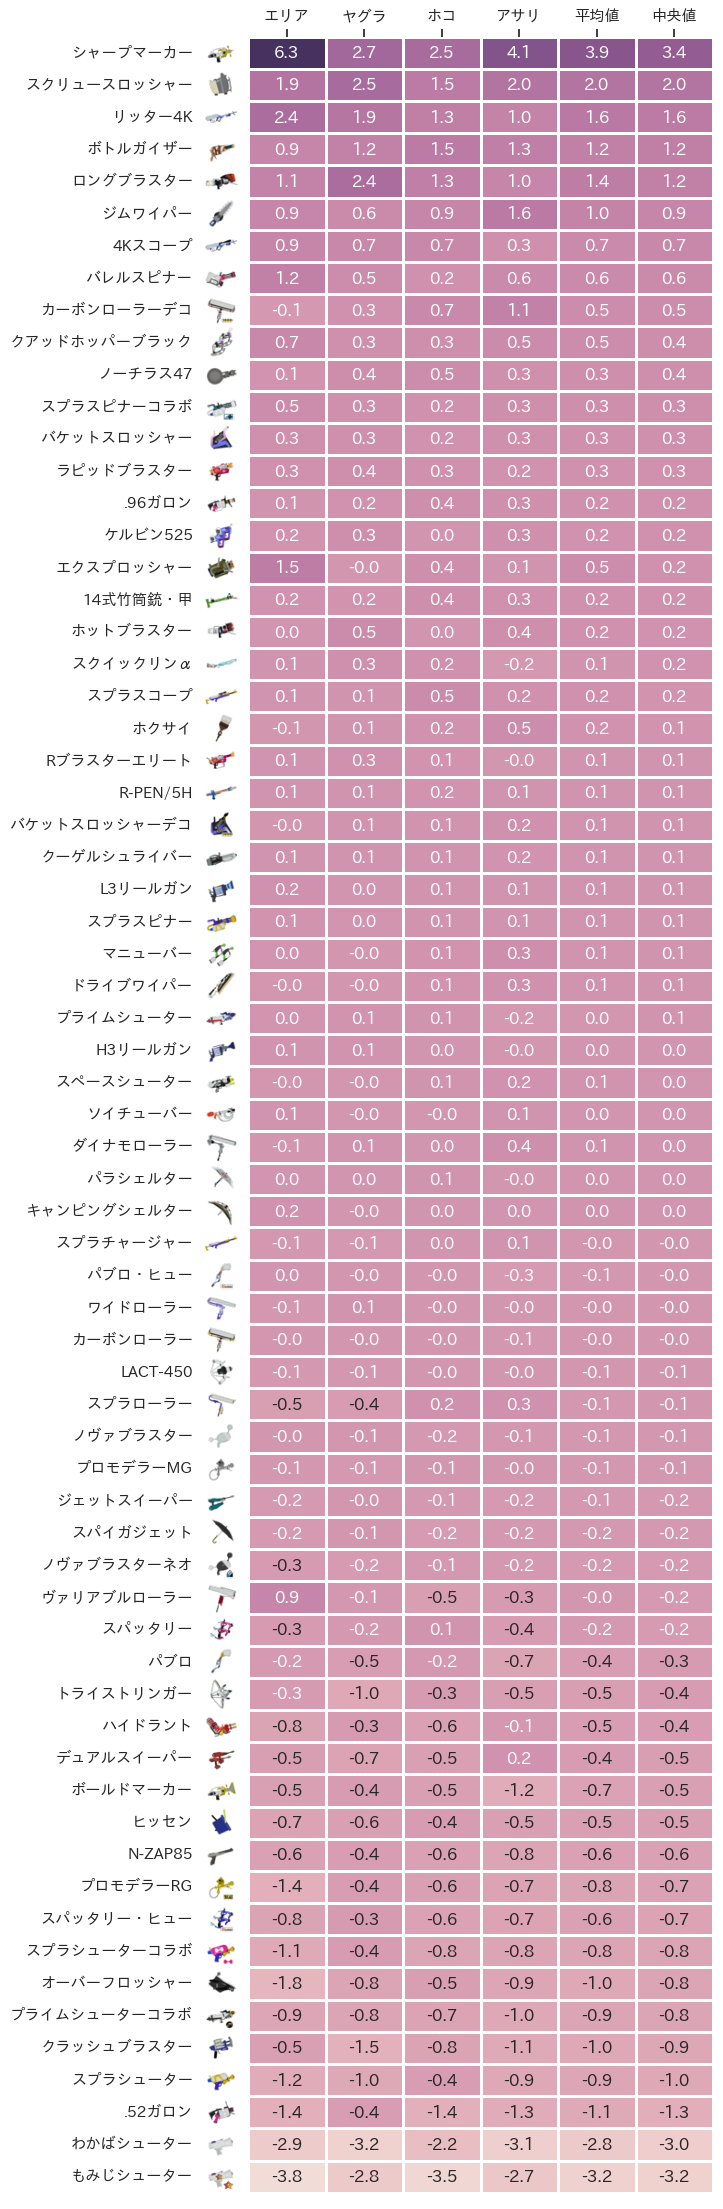

In [424]:
plt, ax = v.show_aggregated_heatmap(gradient, use_annotation_image=True)
plt.show()